<a href="https://colab.research.google.com/github/ndb796/Python-Data-Analysis-and-Image-Processing-Tutorial/blob/master/30.%20%EB%84%A4%EC%9D%B4%EB%B2%84%20%EC%98%81%ED%99%94%20%EB%A6%AC%EB%B7%B0%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%EC%84%9D%20%E2%91%A1%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EC%8B%9C%EA%B0%81%ED%99%94/%EB%84%A4%EC%9D%B4%EB%B2%84%20%EC%98%81%ED%99%94%20%EB%A6%AC%EB%B7%B0%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%EC%84%9D%20%E2%91%A1%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 네이버 영화 리뷰 데이터 분석 2. 데이터 시각화
[강의 노트](https://github.com/ndb796/Python-Data-Analysis-and-Image-Processing-Tutorial/blob/master/30.%20%EB%84%A4%EC%9D%B4%EB%B2%84%20%EC%98%81%ED%99%94%20%EB%A6%AC%EB%B7%B0%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%EC%84%9D%20%E2%91%A1%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EC%8B%9C%EA%B0%81%ED%99%94/%EB%84%A4%EC%9D%B4%EB%B2%84%20%EC%98%81%ED%99%94%20%EB%A6%AC%EB%B7%B0%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%EC%84%9D%20%E2%91%A1%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EC%8B%9C%EA%B0%81%ED%99%94.pdf)

**리뷰 정보 클래스 작성하기**

In [0]:
import urllib.request
from bs4 import BeautifulSoup

class Review:
  def __init__(self, comment, date, star, good, bad):
    self.comment = comment
    self.date = date
    self.star = star
    self.good = good
    self.bad = bad

  def show(self):
    print("내용: " + self.comment +
          "\n날짜: " + self.date +
          "\n별점: " + self.star +
          "\n좋아요: " + self.good +
          "\n싫어요: " + self.bad)

**리뷰 정보 크롤링 함수**

In [0]:
def crawl(url):
  soup = BeautifulSoup(urllib.request.urlopen(url).read(), "html.parser")
  review_list = []
  title = soup.find('h3', class_='h_movie').find('a').text
  div = soup.find("div", class_="score_result")
  data_list = div.select("ul > li")
  
  for review in data_list:
    star = review.find("div", class_="star_score").text.strip()
    reply = review.find("div", class_="score_reple")
    comment = reply.find("p").text
    date = reply.select("dt > em")[1].text.strip()
    button = review.find("div", class_="btn_area")
    sympathy = button.select("strong > span")
    good = sympathy[0].text
    bad = sympathy[1].text
    review_list.append(Review(comment, date, star, good, bad))

  return title, review_list

**데이터 프레임화**

In [0]:
import pandas as pd

def get_summary(review_list):
  star_list = []
  good_list = []
  bad_list = []
  
  for review in review_list:
    star_list.append(int(review.star))
    good_list.append(int(review.good))
    bad_list.append(int(review.bad))
    
  star_series = pd.Series(star_list)
  good_series = pd.Series(good_list)
  bad_series = pd.Series(bad_list)
  
  summary = pd.DataFrame({
      'Star': star_series,
      'Good': good_series,
      'Bad': bad_series,
      'Score': good_series / (good_series + bad_series)
  })
  
  return summary

**다수의 영화 데이터 시각화 ①**

In [6]:
movie_code_list = [136900, 167657, 174321, 184859, 167391]
review_lists = []

for i in movie_code_list:
  title, review_list = crawl("https://movie.naver.com/movie/bi/mi/basic.nhn?code=" + str(i))
  summary = get_summary(review_list)
  print("[ %s ]" % (title))
  print(summary)
  review_lists.append((title, review_list))

[ 어벤져스: 엔드게임 ]
   Star   Good  Bad     Score
0    10  22605  632  0.972802
1    10  14885  420  0.972558
2    10  14503  451  0.969841
3    10  12470  518  0.960117
4    10  11270  409  0.964980
[ 명탐정 피카츄 ]
   Star  Good  Bad     Score
0    10  1873  102  0.948354
1    10   946   81  0.921130
2    10   800   70  0.919540
3     8   924  282  0.766169
4     8   581   34  0.944715
[ 고양이 여행 리포트 ]
   Star  Good  Bad     Score
0    10    55    5  0.916667
1    10    34    3  0.918919
2     6    38   18  0.678571
3    10    21    2  0.913043
4    10    23    4  0.851852
[ 물의 기억 ]
   Star  Good  Bad     Score
0    10    28   10  0.736842
1    10    26   10  0.722222
2    10    23    9  0.718750
3    10    14    2  0.875000
4    10    18    6  0.750000
[ 더 캡틴 ]
   Star  Good  Bad     Score
0     9    65   10  0.866667
1    10    35    4  0.897436
2    10    34    7  0.829268
3     8    28    5  0.848485
4    10    25    5  0.833333


**다수의 영화 데이터 시각화 ②**

In [24]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 131183 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


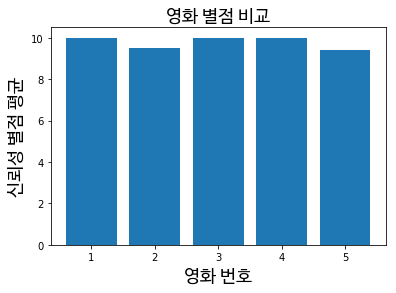

In [55]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=18)

def movie_compare(review_lists):
  count = 1
  x = []
  y = []
  for movie, review_list in review_lists:
    x.append(count)
    summary = get_summary(review_list)
    summary = summary[summary['Score'] > 0.8]
    y.append(summary['Star'].mean())
    count += 1
  plt.bar(x, y)
  plt.title('영화 별점 비교', fontproperties=fontprop)
  plt.xlabel('영화 번호', fontproperties=fontprop)
  plt.ylabel('신뢰성 별점 평균', fontproperties=fontprop)
  plt.show()
  
movie_compare(review_lists)